# Project Overview

### Introduction
This project explores two crucial datasets provided by the United Nations: Gross Domestic Product (GDP) per capita and the percentage of individuals using the internet for each country. These metrics serve as significant indicators of economic and technological advancement and are critical for understanding the developmental trajectory of nations globally. Through this analysis, we aim to uncover patterns, trends, and anomalies within and between these datasets to better grasp the interplay of economic strength and digital adoption across the globe.

### Objectives
* **To Analyze GDP Trends:** Understand how GDP per capita has evolved over the years across different countries and identify factors that might influence these trends.
* **To Examine Internet Usage:** Explore how internet adoption has changed globally, focusing on growth rates and the digital divide between different economies.
* **To Investigate the Relationship Between GDP and Internet Usage:** By merging these datasets, we seek to analyze whether there's a correlation between a country's economic prosperity (as measured by GDP per capita) and its internet usage rates.
* **To Provide Data-Driven Insights:** Offer insights that could assist policymakers, researchers, and educators in understanding the dynamics of economic and technological progress.
* **To Develop Data Analysis Skills:** Enhance personal skills in data manipulation, visualization, and interpretation, crucial for data science and economic analysis careers.

# Setting Up the Environment

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting themes
plt.style.use('seaborn-v0_8-dark')
sns.set_theme(style='dark')

#  Loading and Initial Exploration of GDP Data

In [2]:
#Importing and previewing the CSV 
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [3]:
# Finding # rows/columns and data types
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Data Cleaning and Transformation for GDP Data

In [4]:
# Dropping the Value Footnotes column; and renaming the remaining columns
gdp_df = gdp_df.drop(columns='Value Footnotes')\
               .rename(columns={'Country or Area':'Country', 
                                'Value':'GDP_Per_Capita'})

# Exploratory Data Analysis (EDA) on GDP Data

### How many countries have data for all years?

In [5]:
# Creating series that counts # unique years for each country, turning the series into a DataFrame and naming columns
num_years = gdp_df.groupby('Country')['Year']\
                  .count()\
                  .to_frame()\
                  .rename(columns={'Year':'Num_Years'})\
                  .reset_index()

# Finding number of years in dataset
max_years = num_years['Num_Years'].max()

# Subsetting to find countries with all years of data
all_years = num_years[num_years['Num_Years'] == max_years]

all_years

,Country,Num_Years
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
5,Angola,33
...,...,...
236,Vanuatu,33
237,Viet Nam,33
239,World,33
240,Zambia,33


### Which countries are missing many years of data?

In [6]:
# Subsetting to find countries with missing years, and sorting to view most missing data at the top
missing = num_years[num_years['Num_Years'] < max_years].sort_values('Num_Years')

missing.head(10)

,Country,Num_Years
53,Djibouti,10
197,Somalia,10
225,Turks and Caicos Islands,12
192,Sint Maarten (Dutch part),14
112,Kosovo,15
36,Cayman Islands,16
154,Nauru,19
0,Afghanistan,20
47,CuraÃ§ao,22
213,SÃ£o TomÃ© and Principe,22


### Let's look at the number of observations per year

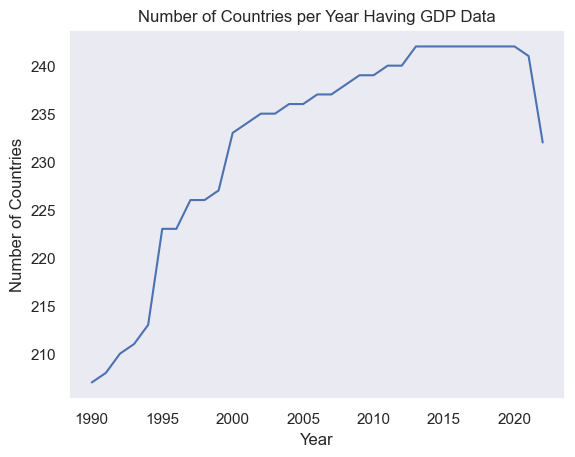

In [7]:
# Creating series, turning into DataFrame, and renaming columns
countries_per_year = gdp_df.groupby('Year')['Country']\
                           .count()\
                           .to_frame()\
                           .reset_index()\
                           .rename(columns={'Country':'Num_Countries'})

# Plotting
plt.plot(countries_per_year.Year, countries_per_year.Num_Countries)
plt.title('Number of Countries per Year Having GDP Data')
plt.ylabel('Number of Countries')
plt.xlabel('Year')
plt.show()

### Comparing the four most recent decades

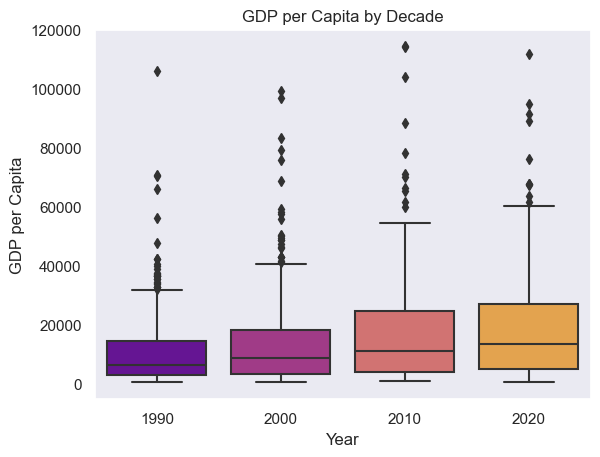

In [8]:
# Subsetting the data
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

# Boxplot
sns.boxplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'], 
            palette='plasma')\
   .set(title='GDP per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP per Capita')

plt.show()

### Which country was the first to have a GDP per capita greater than $100,000?

In [9]:
# Subsetting for >100k, sorting by year ascending and viewing the first row
gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year')[:1]

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


### Which country had the highest GDP per capita in 2020?

In [10]:
# Querying 2020 data
gdp2020 = gdp_df.query('Year == 2020')

# Subsetting to find the country with a GDP matching the max GDP
gdp2020[gdp2020['GDP_Per_Capita'] == gdp2020['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


### Let's look at how Luxembourg's GDP per capita has changed over the timespan of the dataset.

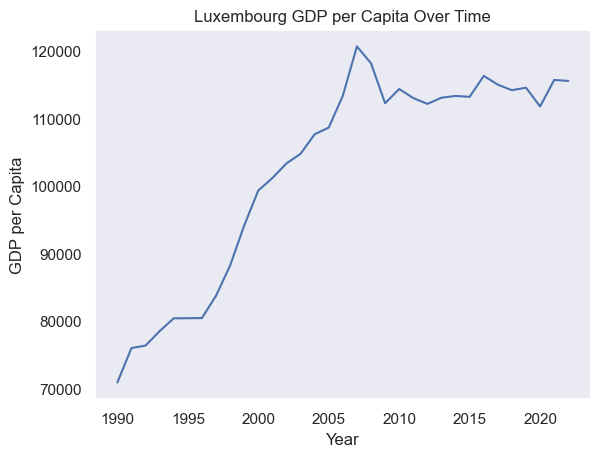

In [11]:
# Subsetting for Luxembourg
gdp_lux = gdp_df[gdp_df['Country'] == 'Luxembourg']

# Creating a plot
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita)
plt.title('Luxembourg GDP per Capita Over Time')
plt.ylabel('GDP per Capita')
plt.xlabel('Year')
plt.show()

### Which country had the lowest GDP per capita in 2020?

In [12]:
#Subsetting the 2020 dataframe for the lowest GDP
gdp2020[gdp2020['GDP_Per_Capita'] == gdp2020['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


### How has Burundi's GDP per capita has changed over the timespan of the dataset?

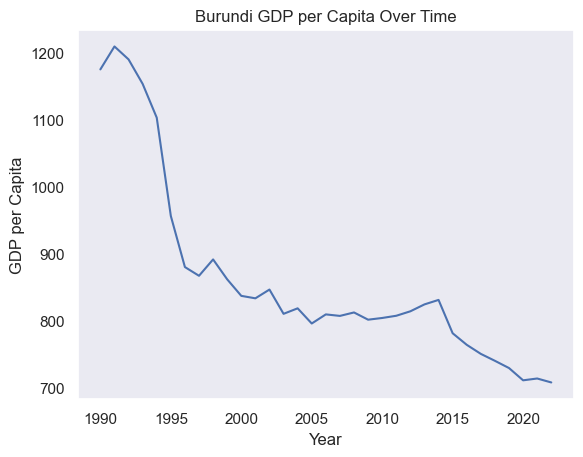

In [13]:
# Subsetting for Burundi
gdp_burundi = gdp_df[gdp_df['Country'] == 'Burundi']

# Creating a plot
plt.plot(gdp_burundi.Year, gdp_burundi.GDP_Per_Capita)
plt.title('Burundi GDP per Capita Over Time')
plt.ylabel('GDP per Capita')
plt.xlabel('Year')
plt.show()

### Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 

In [14]:
# Filtering to 1990 and 2020, then creating a pivot table to compare years
gdp_1990_2020 = gdp_df[gdp_df['Year'].isin([1990, 2020])]\
                                     .pivot(index='Country', 
                                            columns='Year', 
                                            values='GDP_Per_Capita')

# Adding a Boolean column to identify if a country's GDP increased from 1990 to 2020
gdp_1990_2020['GDP_Increase'] = gdp_1990_2020[2020] > gdp_1990_2020[1990]

# Subsetting to see countries that increased, then counting how many
gdp_1990_2020[gdp_1990_2020['GDP_Increase'] == True].count()['GDP_Increase']

188

In [15]:
# Subsetting to see countries that decreased, then counting how many
gdp_1990_2020[gdp_1990_2020['GDP_Increase'] == False].count()['GDP_Increase']

54

From 1990 to 2020, 188 countries increased GDP while 54 countries did not. So yes, countries typically increased GDP over this time period. You can see the exceptions in the output below.

### Which countries had lower GDP per capita in 2020 than in 1990?

In [16]:
# Here are the countries that did not increase GDP from 1990 to 2020
gdp_1990_2020[gdp_1990_2020['GDP_Increase'] == False]

Year,1990,2020,GDP_Increase
Country,,,
Afghanistan,NaN,1968.341002,False
Barbados,14097.395550,13805.777541,False
Bosnia and Herzegovina,NaN,14587.481737,False
Brunei,70358.724094,61603.550804,False
Burundi,1175.155086,711.355263,False
Cambodia,NaN,4276.184539,False
Cayman Islands,NaN,67530.693800,False
Central African Republic,1200.613390,847.765012,False
Congo,5007.319245,3384.654335,False


# Loading, Cleaning, and Transformation of Internet Usage Data

In [17]:
# Importing and previewing the CSV, removing bad lines
internet_df = pd.read_csv('../data/internet_use.csv', 
                          on_bad_lines='skip')

# There were some rows where data was in the wrong column
internet_df = internet_df[internet_df['Value'].notna()] 

# Converting Year column to integer
internet_df['Year'] = internet_df['Year'].astype(int)

#Dropping footnotes and renaming columns
internet_df = internet_df.drop(columns='Value Footnotes')\
                         .rename(columns={'Country or Area':'Country', 
                                'Value':'Internet_Users_Pct'})

# Exploratory Data Analysis (EDA) on Internet Usage Data

### Looking at the number of observations per year

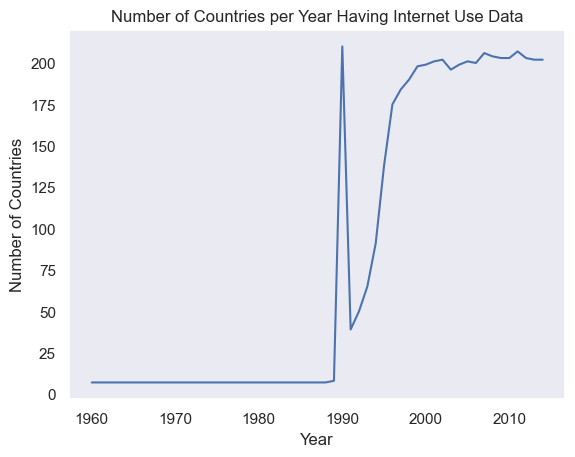

In [18]:
# Creating series counting number of countries per year, turning into DataFrame, and renaming columns
internet_countries_per_year = internet_df.groupby('Year')['Country']\
                                         .count()\
                                         .to_frame()\
                                         .reset_index()\
                                         .rename(columns={'Country':'Num_Countries'})

# Plotting
plt.plot(internet_countries_per_year.Year, internet_countries_per_year.Num_Countries)

plt.title('Number of Countries per Year Having Internet Use Data')
plt.ylabel('Number of Countries')
plt.xlabel('Year')
plt.show()

### What is the first year to have a non-zero internet users percentage value?

In [19]:
# Subsetting for users > 0 and finding the minimum year
internet_df[internet_df['Internet_Users_Pct'] > 0].min()['Year']

1990

### How does the distribution of internet users percent differ for 2000 and 2014?

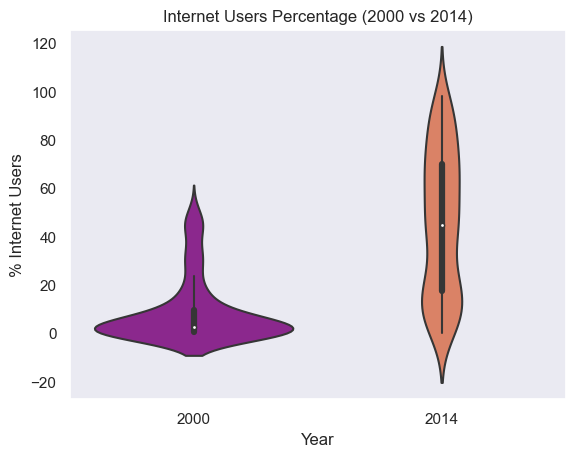

In [20]:
# Filtering to 2000 and 2014
internet_2000_2014 = internet_df[internet_df['Year'].isin([2000, 2014])]

# Violin plot
sns.violinplot(x=internet_2000_2014['Year'], 
               y=internet_2000_2014['Internet_Users_Pct'], 
               palette='plasma')\
   .set(title='Internet Users Percentage (2000 vs 2014)', 
        xlabel='Year', 
        ylabel='% Internet Users')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


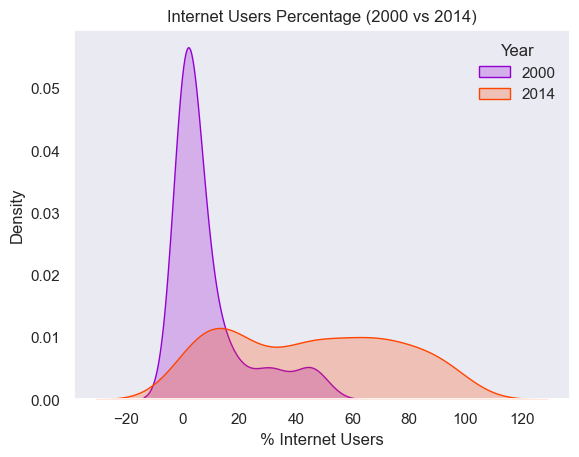

In [21]:
# Filtering to 2000 and 2014, respectively
internet_2000 = internet_df[internet_df['Year'] == 2000]

internet_2014 = internet_df[internet_df['Year'] == 2014]

# Density plots
sns.kdeplot(internet_2000['Internet_Users_Pct'], 
            fill=True, 
            color="darkviolet", 
            label='2000')

sns.kdeplot(internet_2014['Internet_Users_Pct'], 
            fill=True, 
            color="orangered", 
            label='2014')

plt.title('Internet Users Percentage (2000 vs 2014)')
plt.xlabel('% Internet Users')
plt.ylabel('Density')
plt.legend(title='Year')

plt.show()

In 2000, the distribution of internet usage percentages is right-skewed, indicating that the majority of countries had a very low percentage of internet users. However, by 2014, although the distribution is not perfectly normal, it shows a more balanced spread, particularly evident from around 10% to 80% internet users. These differences between the two years highlight the increasing accessibility and availability of the internet over time.

### For how many countries was the percentage of internet users below 5% in 2014?

In [22]:
# Querying for year and internet %, then counting how many countries
internet_df.query('Year == 2014 and Internet_Users_Pct < 5').count()['Country']

16

# Merging GDP and Internet Usage Data

In [23]:
# Merging the two dataframes
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'], how='outer')

gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


### What three countries had the highest internet users percentage in 2014?

In [24]:
#Subsetting for 2014 then sorting by internet % desc to see top 3
top_internet_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]\
                    .sort_values('Internet_Users_Pct', ascending=False)\
                    .head(3)\
                    ['Country'].tolist()

### How has GDP per capita has changed over time for these three countries?

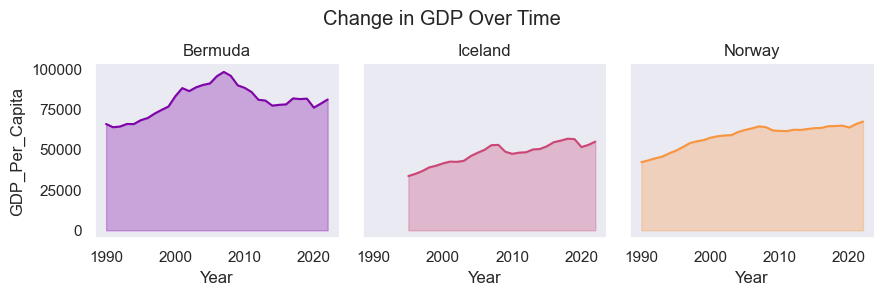

In [25]:
# Creating the table to plot, subestting to our top 3 countries found above
top_internet_all_years = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_internet_2014)]

# Creating the facet grid
grid = sns.FacetGrid(top_internet_all_years, 
                     col='Country', 
                     hue='Country', 
                     palette='plasma')

# Adding the data
grid = grid.map(plt.plot, 'Year', 'GDP_Per_Capita')

# Filling in the lines
grid = grid.map(plt.fill_between, 'Year', 'GDP_Per_Capita', alpha=0.3)

# Titling the indivitual plots
grid = grid.set_titles("{col_name}")

# Titling the entire grid
plt.subplots_adjust(top=.8)
grid = grid.fig.suptitle('Change in GDP Over Time')

In 2014, Iceland, Bermuda, and Norway emerged as the top three countries with the highest internet usage percentages. Interestingly, while Bermuda consistently boasted a higher GDP than Iceland and Norway throughout the years, its economic trajectory has been more erratic. In contrast, Iceland and Norway, despite having lower GDPs, have demonstrated a more stable growth pattern over time.

### Let's look at 2014's Internet Users Percentage and GDP per Capita

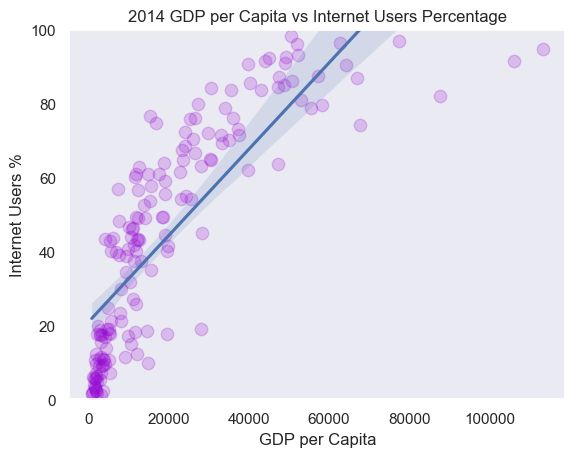

In [26]:
# Subsetting for 2014
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].copy()

# Creating a scatterplot
sns.regplot(
    x=gdp_and_internet_use_2014['GDP_Per_Capita'],
    y=gdp_and_internet_use_2014['Internet_Users_Pct'],
    scatter_kws={
        'color':'darkviolet',
        'alpha':0.2,
        's':80})
plt.title('2014 GDP per Capita vs Internet Users Percentage')
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Users %')
#Control y axis limits to 100
plt.ylim(0, 100)
plt.show()

In [27]:
# Investigating the outliers
gdp_and_internet_use_2014.dropna(subset=['Internet_Users_Pct'])\
                         .sort_values('GDP_Per_Capita', ascending=False)\
                         .head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4154,Luxembourg,2014,113313.578898,94.67
5752,Qatar,2014,106141.326189,91.49
6114,Singapore,2014,87702.521984,82.00


In [28]:
# Correlation between GDP and Internet Use
gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.8181636006288349

Based on the plot, it's evident that GDP and Internet Usage exhibit a strong positive correlation (0.818). However, there are three notable outliers among the countries with the highest GDP: Luxembourg, Qatar, and Singapore. Despite their economic strength, these countries have fewer internet users than expected, deviating from the general trend.

### Now let's categorize GDP into low, medium, or high

In [29]:
# Creating GDP Categories and adding to the DataFrame
gdp_and_internet_use_2014['GDP_Cat'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 
                                               3, 
                                               labels=['Low', 'Medium', 'High'])

### How does the median internet users percentage compare for the three GDP groups?

In [30]:
# Grouping by GDP Category, then finding the median internet %
grouped_gdp_internet_2014 = gdp_and_internet_use_2014.groupby('GDP_Cat')\
                                                     .median('Internet_Users_Pct')\
                                                     .reset_index()\
                                                     .drop(columns='Year')\
                                                     .rename(columns={'Internet_Users_Pct':'Median_Internet_Users_Perc', 
                                                                      'GDP_Per_Capita':'Median_GDP_Per_Capita'})
grouped_gdp_internet_2014

/var/folders/09/j9tptphx6fn88qcs22y_tvsh0000gn/T/ipykernel_82714/3855377065.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_gdp_internet_2014 = gdp_and_internet_use_2014.groupby('GDP_Cat')\


,GDP_Cat,Median_GDP_Per_Capita,Median_Internet_Users_Perc
0,Low,3378.364591,10.6
1,Medium,12164.228037,43.4
2,High,37454.808489,78.7


# Literacy Rates
For curiosity's sake, I'm intrigued to explore how literacy rates intersect with the relationship between GDP and internet usage. In this section, I import literacy rate data for UN countries, merge it with the GDP and Internet DataFrames, and visualize the combined dataset.

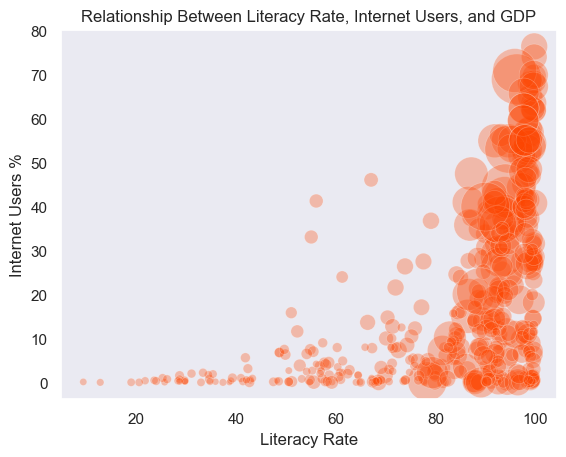

In [31]:
# Importing Literacy rate among adults aged >= 15 years (%)
literacy_df = pd.read_csv('../data/literacy_rate.csv')

# Dropping footnotes and renaming columns
literacy_df = literacy_df.drop(columns='Value Footnotes')\
                         .rename(columns={'Country or Area':'Country',
                                          'Year(s)':'Year',
                                          'Value':'Literacy_Rate'})

# There were some rows where data was in the wrong column
literacy_df = literacy_df[literacy_df['Literacy_Rate'].notna()] 

# Converting Year column to integer
literacy_df['Year'] = literacy_df['Year'].astype(int)

# Merging the two dataframes
literacy_gdp_internet = gdp_and_internet_use.merge(literacy_df, on=['Country', 'Year'], how='outer')

# Building a bubble map
sns.scatterplot(data=literacy_gdp_internet, 
                x='Literacy_Rate', 
                y='Internet_Users_Pct', 
                size='GDP_Per_Capita', 
                legend=False, 
                sizes=(20, 2000), 
                alpha=.3, 
                color='orangered')

plt.title('Relationship Between Literacy Rate, Internet Users, and GDP')
plt.xlabel('Literacy Rate')
plt.ylabel('Internet Users %')

plt.show()

While numerous countries with low percentages of internet users and GDP exhibit high literacy rates, it's noteworthy that all countries with literacy rates below 50% demonstrate low percentages of internet users and GDP. This observation underscores the close association between literacy rates, internet access, and economic development.